# Most Common Adjective, Verb and Noun Graph
## Dependency Installation and Module Import

In [122]:
%pip install spacy

import spacy
from collections import Counter
import matplotlib.pyplot as plt
import glob
import pandas as pd
import sys
import os
import seaborn as sns

if sys.platform.startswith('win'):
    os.system('python -m spacy download en_core_web_sm')
elif sys.platform.startswith('darwin') or sys.platform.startswith('linux'):
    os.system('python3 -m spacy download en_core_web_sm')

nlp = spacy.load("en_core_web_sm")

Note: you may need to restart the kernel to use updated packages.
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


### Change the count_of_words to get the top n words

In [123]:
count_of_words = 10

## Function Definitions

In [124]:
def plot_common_words_file(file_path):
    # Initialize empty lists to store words
    nouns = []
    adjectives = []
    verbs = []

    with open(file_path, "r") as file:
        text = file.read()
        doc = nlp(text)

        # Extract and filter nouns, adjectives, and verbs
        for token in doc:
            if token.pos_ == "NOUN" and not token.is_stop and not token.is_punct and token.lemma_.isalpha() and len(token.lemma_) > 2:
                nouns.append(token.text)
            elif token.pos_ == "ADJ" and not token.is_stop and not token.is_punct and token.lemma_.isalpha() and len(token.lemma_) > 2:
                adjectives.append(token.text)
            elif token.pos_ == "VERB" and not token.is_stop and not token.is_punct and token.lemma_.isalpha() and len(token.lemma_) > 2:
                verbs.append(token.text)

    # Count the frequency of each word
    nouns_fd = Counter(nouns)
    adjectives_fd = Counter(adjectives)
    verbs_fd = Counter(verbs)

    # Get the top 30 most frequent words
    nouns_30 = nouns_fd.most_common(count_of_words)
    adjectives_30 = adjectives_fd.most_common(count_of_words)
    verbs_30 = verbs_fd.most_common(count_of_words)

    # Create a DataFrame with the top 30 words and their frequencies
    df = pd.DataFrame({'Nouns': [word for word, freq in nouns_30], 'Nouns Frequency': [freq for word, freq in nouns_30],
                       'Adjectives': [word for word, freq in adjectives_30], 'Adjectives Frequency': [freq for word, freq in adjectives_30],
                       'Verbs': [word for word, freq in verbs_30], 'Verbs Frequency': [freq for word, freq in verbs_30]})

    # Plot the bar charts
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    plt.subplots_adjust(wspace=0.4)

    sns.barplot(x='Nouns Frequency', y='Nouns', data=df, ax=axes[0], palette="Blues_d")
    axes[0].set_title(f"Top {count_of_words} Nouns")
    axes[0].set_xlabel("Frequency")

    sns.barplot(x='Adjectives Frequency', y='Adjectives', data=df, ax=axes[1], palette="Greens_d")
    axes[1].set_title(f"Top {count_of_words} Adjectives")
    axes[1].set_xlabel("Frequency")

    sns.barplot(x='Verbs Frequency', y='Verbs', data=df, ax=axes[2], palette="Reds_d")
    axes[2].set_title(f"Top {count_of_words} verbs")
    axes[2].set_xlabel("Frequency")

    fig.suptitle(f"Top {count_of_words} Words in the Book: \"{file_path.rsplit('/', 1)[-1].rsplit('.', 1)[0]}\"", fontweight="bold", fontsize=16)

    plt.show()

def plot_common_words_corpus(directory):
    # Initialize empty lists to store words
    nouns = []
    adjectives = []
    verbs = []

    # Read and process each text file in the directory
    for file_path in glob.glob(directory + "/*.txt"):
        with open(file_path, "r") as file:
            text = file.read()

        doc = nlp(text)

        # Extract and filter nouns, adjectives, and verbs
        for token in doc:
            if token.pos_ == "NOUN" and not token.is_stop and not token.is_punct and token.lemma_.isalpha() and len(token.lemma_) > 2:
                nouns.append(token.text)
            elif token.pos_ == "ADJ" and not token.is_stop and not token.is_punct and token.lemma_.isalpha() and len(token.lemma_) > 2:
                adjectives.append(token.text)
            elif token.pos_ == "VERB" and not token.is_stop and not token.is_punct and token.lemma_.isalpha() and len(token.lemma_) > 2:
                verbs.append(token.text)

    # Count the frequency of each word
    nouns_fd = Counter(nouns)
    adjectives_fd = Counter(adjectives)
    verbs_fd = Counter(verbs)

    # Get the top 30 most frequent words
    nouns_30 = nouns_fd.most_common(count_of_words)
    adjectives_30 = adjectives_fd.most_common(count_of_words)
    verbs_30 = verbs_fd.most_common(count_of_words)

    # Create a DataFrame with the top 30 words and their frequencies
    df = pd.DataFrame({'Nouns': [word for word, freq in nouns_30], 'Nouns Frequency': [freq for word, freq in nouns_30],
                       'Adjectives': [word for word, freq in adjectives_30], 'Adjectives Frequency': [freq for word, freq in adjectives_30],
                       'Verbs': [word for word, freq in verbs_30], 'Verbs Frequency': [freq for word, freq in verbs_30]})

    # Plot the bar charts
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    plt.subplots_adjust(wspace=0.4)

    sns.barplot(x='Nouns Frequency', y='Nouns', data=df, ax=axes[0], palette="Blues_d")
    axes[0].set_title(f"Top {count_of_words} Nouns")
    axes[0].set_xlabel("Frequency")

    sns.barplot(x='Adjectives Frequency', y='Adjectives', data=df, ax=axes[1], palette="Greens_d")
    axes[1].set_title(f"Top {count_of_words} Adjectives")
    axes[1].set_xlabel("Frequency")

    sns.barplot(x='Verbs Frequency', y='Verbs', data=df, ax=axes[2], palette="Reds_d")
    axes[2].set_title(f"Top {count_of_words} verbs")
    axes[2].set_xlabel("Frequency")
    fig.suptitle(f"Top {count_of_words} Words in \"{directory}\" Corpus", fontweight="bold", fontsize=16)


    plt.show()

## Running the code

The `plot_common_words_corpus(directory)` function analyzes a corpus of text files located in the specified directory. It identifies the most common words across all the files and plots their frequencies. This function is useful when you want to understand the most frequently used words in a large set of documents.

The `plot_common_words_file(file_path)` function, on the other hand, analyzes a single text file at the given file path. It identifies the most common words in that file and plots their frequencies. This function is useful when you want to understand the most frequently used words in a specific document.

Here are a few examples:

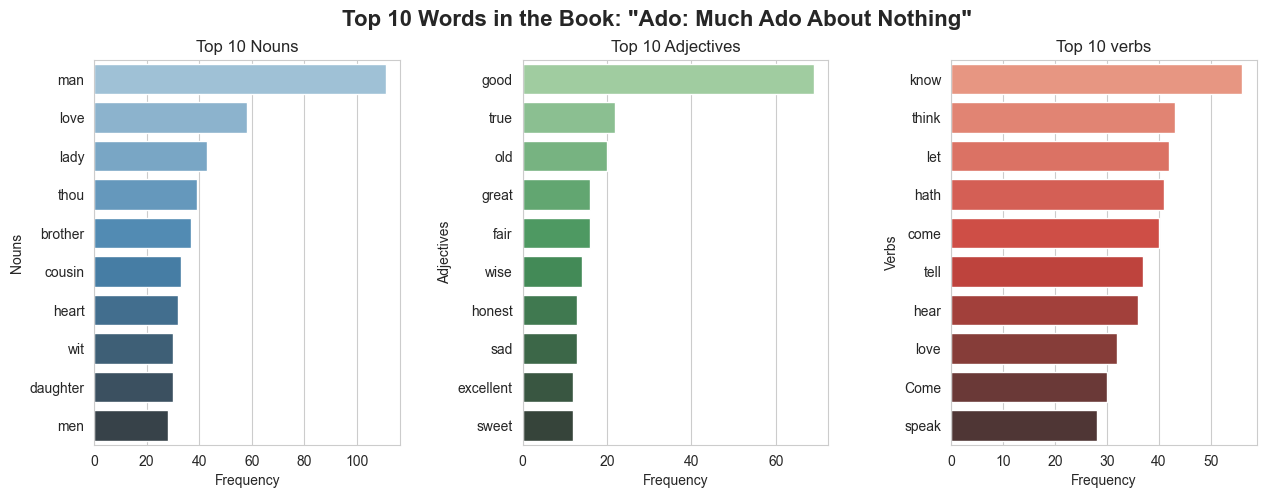

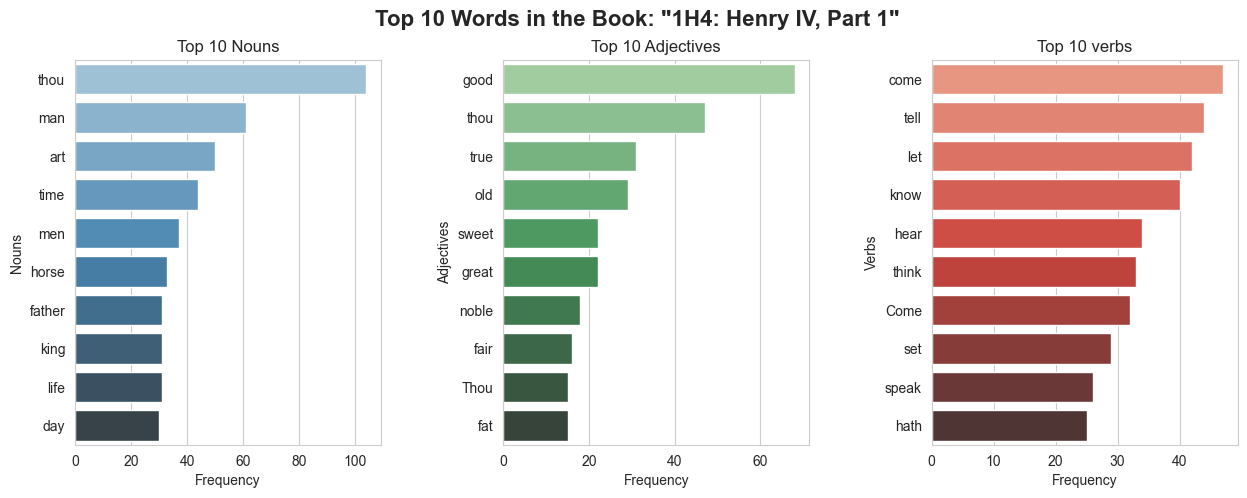

In [125]:
plot_common_words_file("books/Shakespeare-corpus/Ado: Much Ado About Nothing.txt")
plot_common_words_file("books/Shakespeare-corpus/1H4: Henry IV, Part 1.txt")

#### Uncomment the following lines to get Shakespeare's and Marlowe's most common words from the corpus as a whole
Any line that starts with a # is ignored the computer
The Shakespeare/Marlowe corpus may take a long time to execute so I commented them out

In [126]:
#plot_common_words_corpus("books/Shakespeare-corpus")
#plot_common_words_corpus("books/Marlowe-corpus")

#### On the other hand, the following will generate a graph for every single file found under the Shakespeare or Marlowe corpora
Any line that starts with a # is ignored the computer
The Shakespeare/Marlowe corpus may take a long time to execute so I commented them out

In [127]:
# for file in glob.glob("books/Shakespeare-corpus/*.txt"): plot_common_words_file(file)
# for file in glob.glob("books/Marlowe-corpus/*.txt"): plot_common_words_file(file)

### Custom Corpus
To run this code simply uncomment the following line

In [128]:
# plot_common_words_corpus("books/custom-corpus")

The following block was left empty so you may experiment.